![](../images/iris_data.png)

![](../images/random_forest.png)

In [1]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=150, n_features=4, centers=4) 
# centers : default 3 - label의 개수를 조절하는 인자

In [11]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
import numpy as np

#centers에 의해 변경된다
np.unique(y)

array([0, 1, 2, 3])

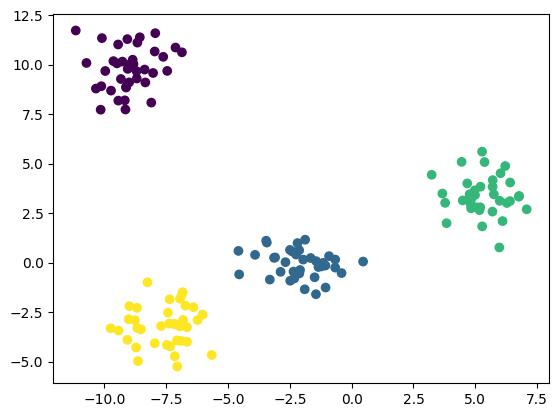

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X, y = make_blobs(n_samples=150, n_features=2)

In [28]:
X.shape, y.shape

((150, 2), (150,))

In [25]:
np.unique(y)

array([0, 1, 2])

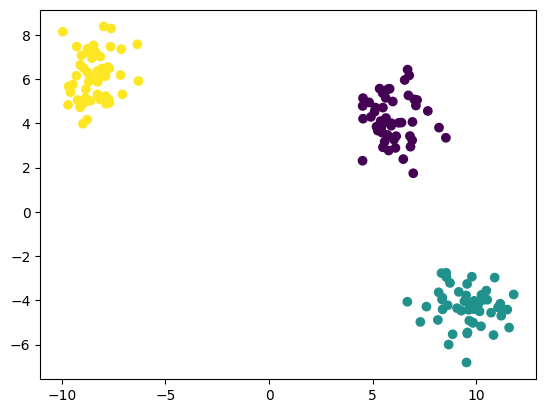

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y)

우리가 해볼 과정(간략한 예시)  
![](../images/output.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y) # col 2개라 reshape도 안 함

DecisionTreeClassifier()

In [33]:
y_pred = model.predict(X) # X : (150, 2)
y_pred.shape

(150,)

In [41]:
model.predict([[1, 1]]), model.predict([[1, -5]])

(array([0]), array([1]))

In [81]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    # 얘네한테 색을 입힘
    xx, yy = np.meshgrid(np.linspace(*xlim, num=50),
                         np.linspace(*ylim, num=50))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    # ax.scatter(xx, yy, s=1) # 그림에 추가해 봄
    ax.set(xlim=xlim, ylim=ylim)

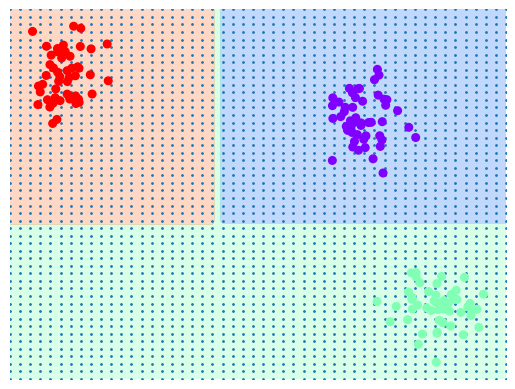

In [37]:
visualize_classifier(DecisionTreeClassifier(), X, y)

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.507\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= -0.893\ngini = 0.5\nsamples = 100\nvalue = [50, 0, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]')]

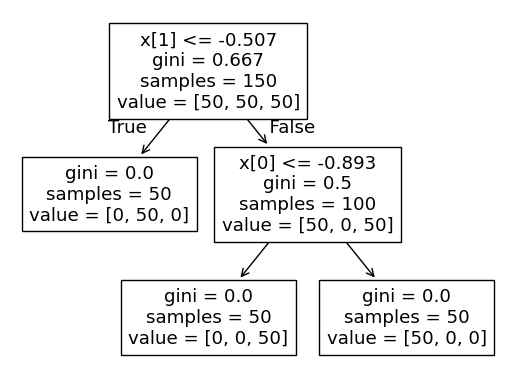

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model)
# 장점 : 의사결정의 이유가 명확하게 보인다!

In [59]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

In [60]:
X.shape, y.shape

((150, 4), (150,))

In [61]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

1.0

In [67]:
model.get_depth()

5

In [68]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamp

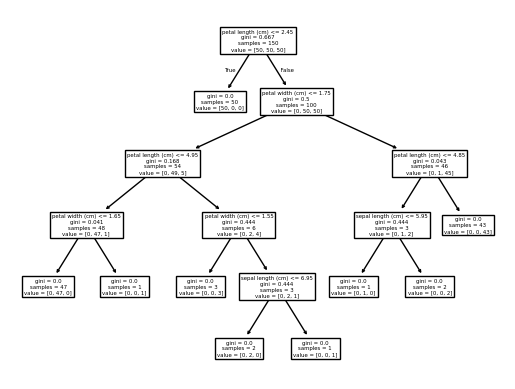

In [69]:
plot_tree(model, feature_names=data.feature_names)

그러나 위의 상황처럼 model을 실행하면 과적합 문제가 발생  
어떻게 해결하나?

#### 앙상블
![](../images/Ensemble.jpg)  
조금 낮은 성능의 트리를 여러개 만들어서 트리들의 투표를 통해서 의사결정을 이루다 `like 집단지성`  
  
그렇다면 어떻게 성능을 낮추나?  
데이터를 다 안 본다(Bagging)
  + (150, 4) 짜리 데이터를 (100, 4), (100, 4), ... 형태의 subset으로 학습을 한다  
  + 또는 (150, 2), (150, 3) 등 feature를 줄인 subset으로 학습

In [74]:
X, y = make_blobs(n_samples=150, n_features=2)
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

1.0

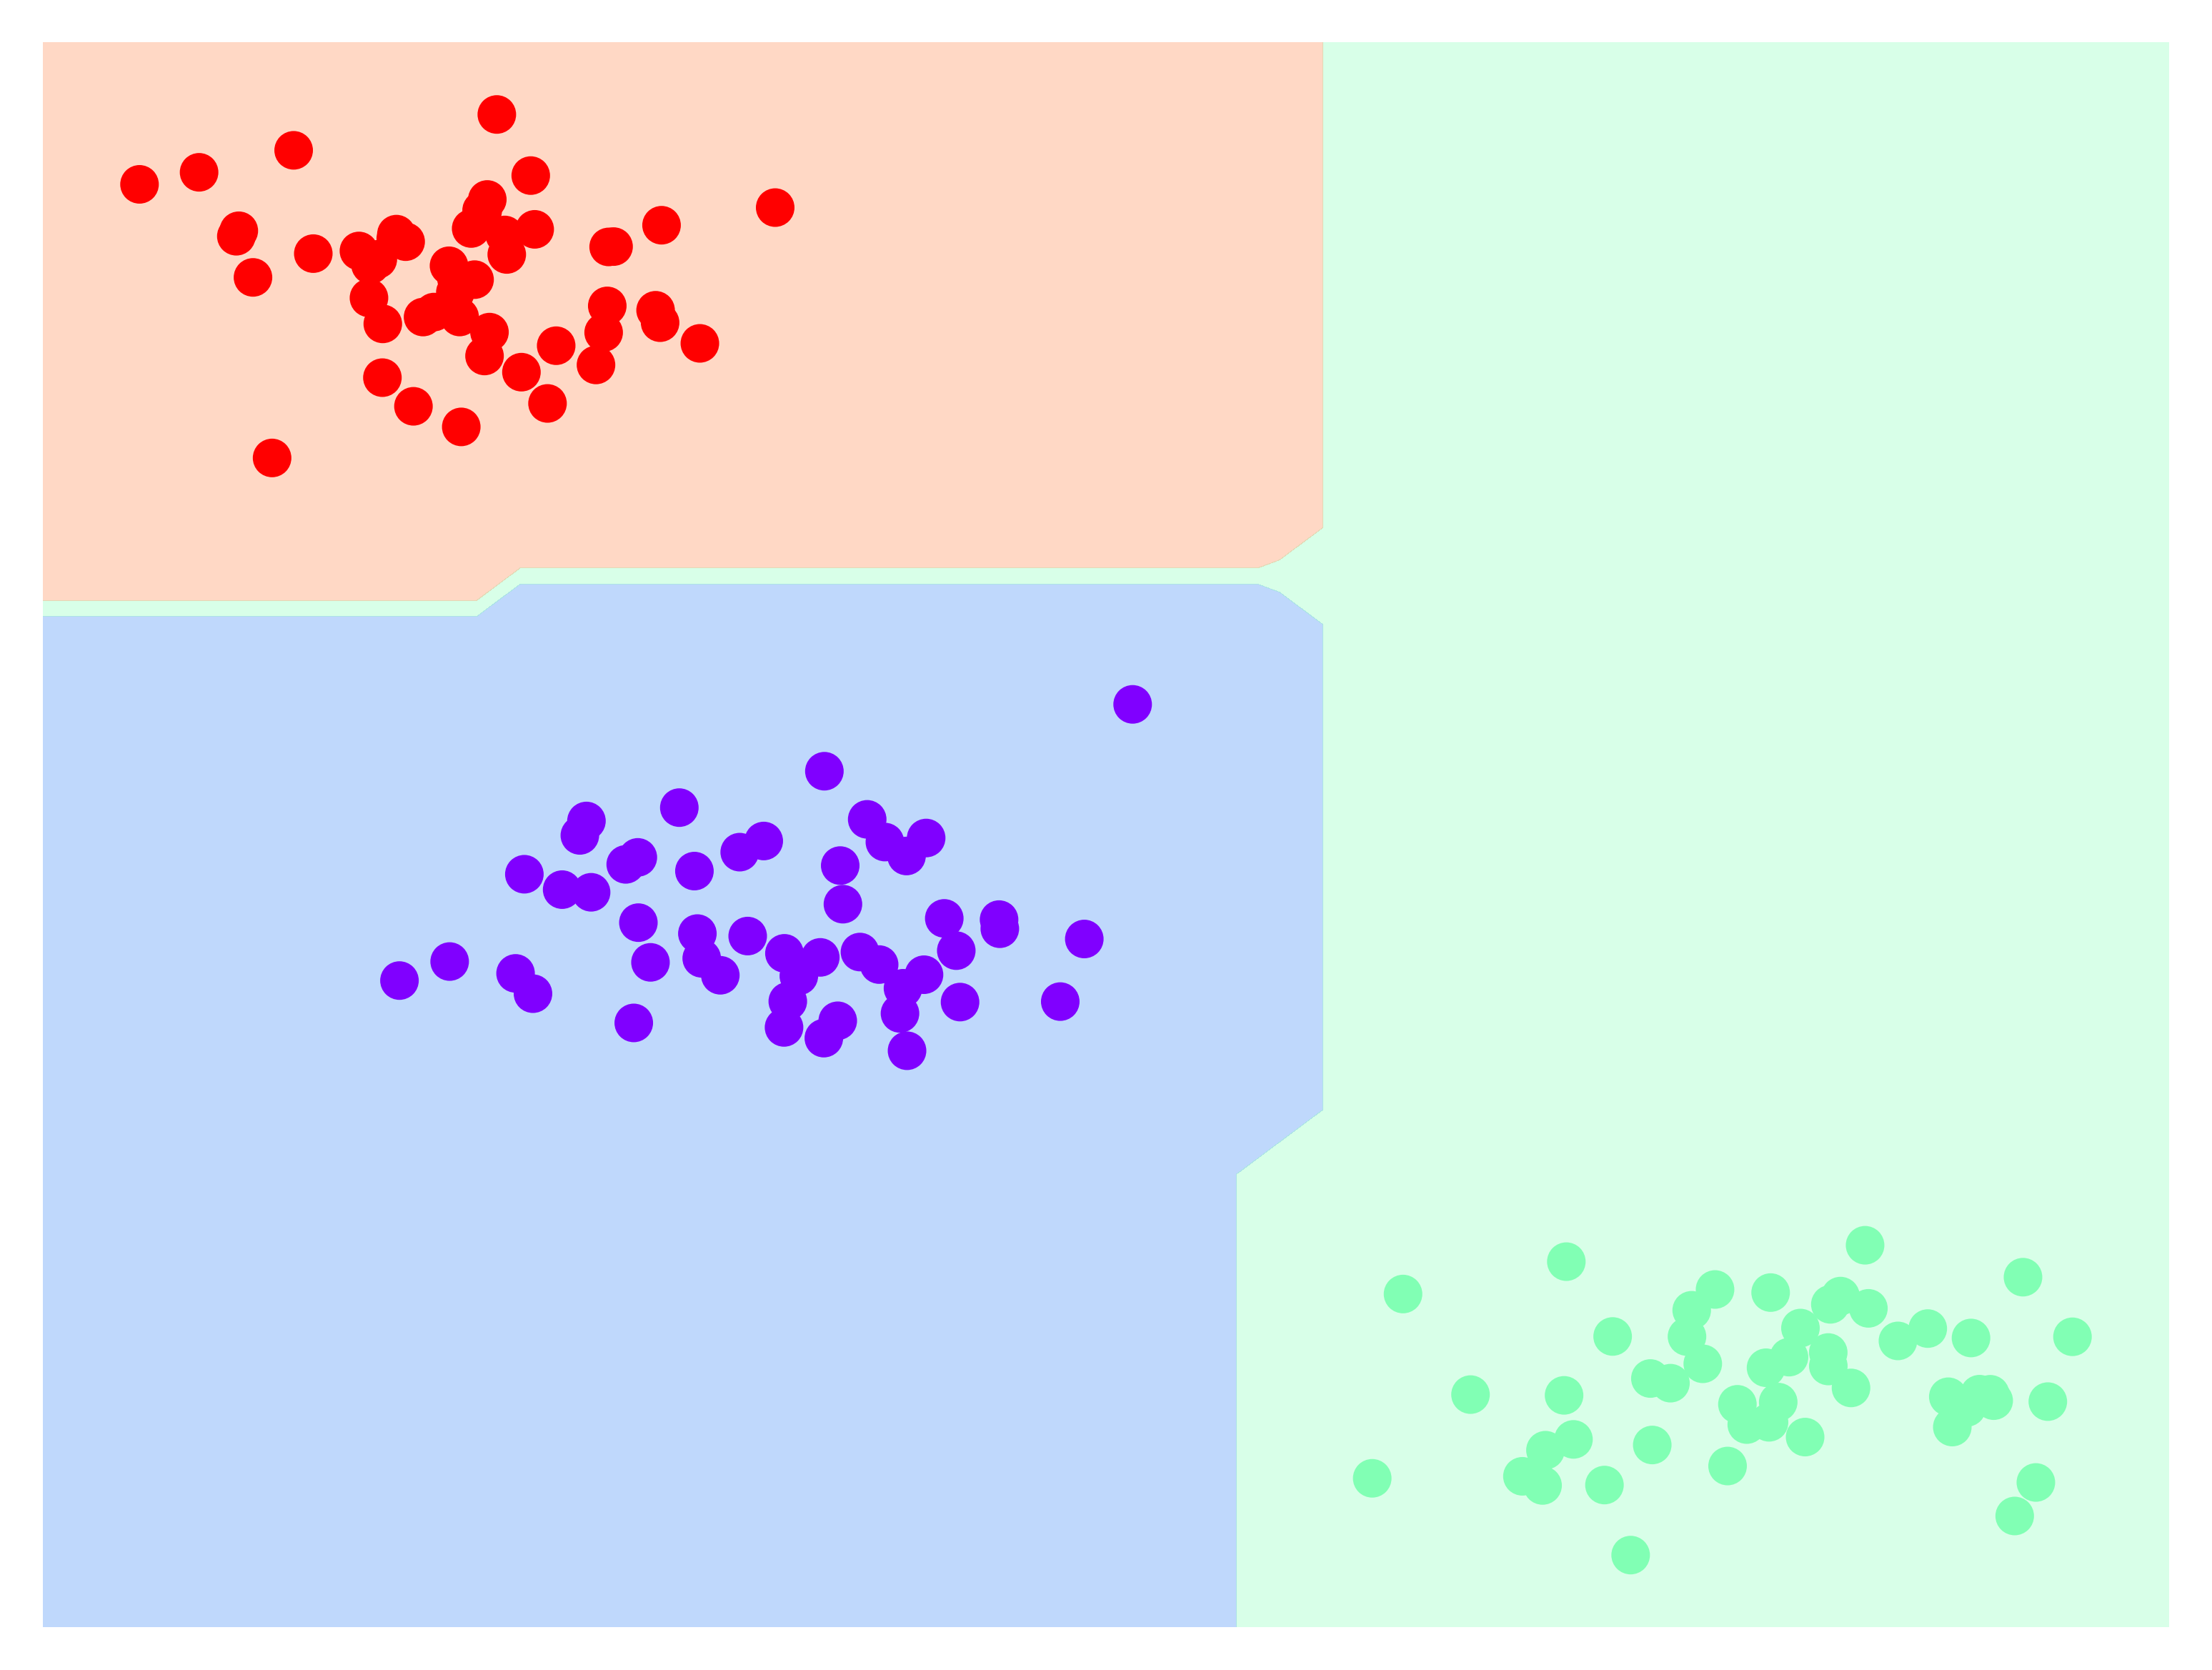

In [82]:
visualize_classifier(RandomForestClassifier(), X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [85]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1.shape

(38,)

In [87]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2.shape

(38,)

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)

(0.9210526315789473, 0.8947368421052632)